<center>
    <h1> 
            Teste de Subtração: Segmentando Defeitos de Tecidos de Jeans Através de Subtração
    </h1>
</center>
    <div style="text-align: right;"><h3>
        Carlos Eduardo Cassimiro da Silva
    </h3></div>
    
<p>Ao comparar um tecido de jeans um defeito com outro sem defeito, torna fácil identificar onde está esse defeito, pois podemos notar fácilmente a diferença entre os dois tecidos. Para tentar realizar um procedimento similar em computadores, precisamos subtrair duas imagens de tecido no mesmo esquema. Nesse notebook iremos verificar se conseguimos utilizar essa técnica para segmentação.</p>

<h4>Roteiro</h4>
Módulos utilizados <br>
1. Abrindo as imagens <br>
2. Visualizando os histogramas <br>
3. Diferença dos tecidos com e sem defeito (subtração das imagens)<br>
4.1 Máscara 3x3 <br>
4.2 Máscara 5x5 <br>
5. Teste borramento com outras amostras de tecido <br>
5.1 Máscara 3x3 <br>
5.2 Máscara 5x5 <br>
5.3 Máscara 7x7 <br>
6. Conclusão

##### Módulos utilizados

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

plt.style.use('ggplot')

## 1. Abrindo as imagens

In [3]:
imgs = {'sem_defeito':{'matriz':cv2.cvtColor(cv2.imread('Tecido.jpeg'), cv2.COLOR_BGR2GRAY)}}
imgs['sem_defeito']['hist'] = cv2.calcHist(imgs['sem_defeito']['matriz'],[0],None,[256],[0,256])

for i in range(1,8):
    key = 'defeito_'+str(i)
    imgs[key] = {'matriz': cv2.cvtColor(cv2.imread('Tecido_defeito_'+str(i)+'.png'), cv2.COLOR_BGR2GRAY)}
    imgs[key]['hist'] = cv2.calcHist(imgs[key]['matriz'],[0],None,[256],[0,256])

## 2. Visualizando os histogramas

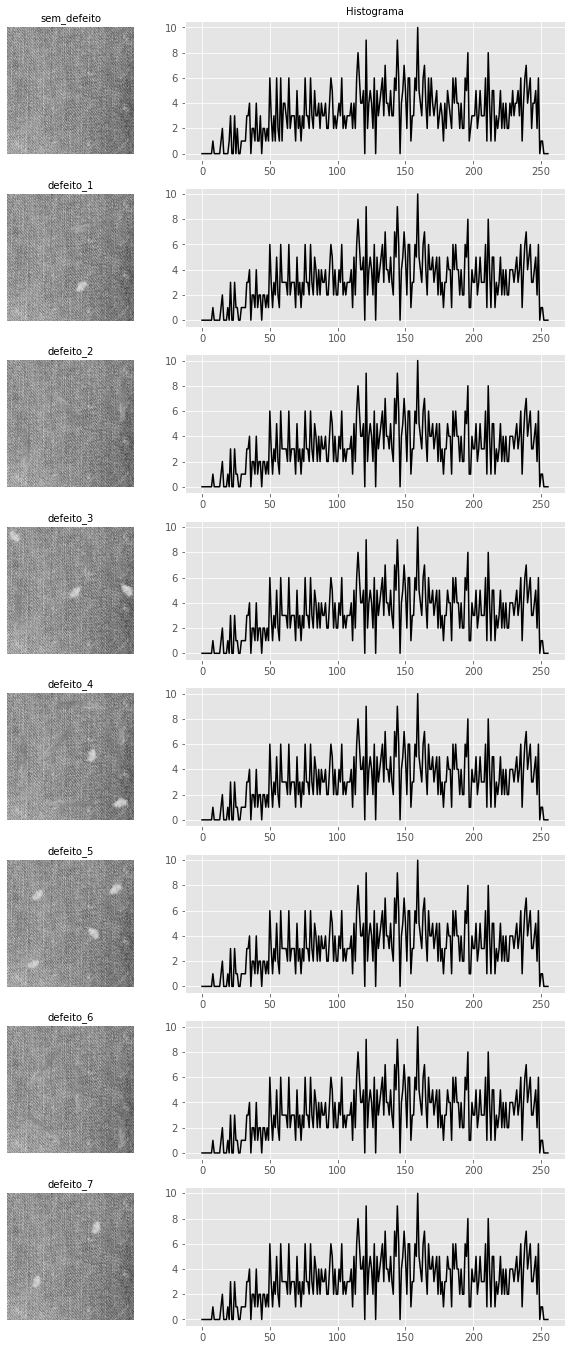

In [4]:
n = len(imgs.keys()) # Definindo o número de linhas
fig , ax = plt.subplots(n, 2, figsize=(10,3*n), gridspec_kw={'width_ratios': [1,3]}) # Criando a "estura" do subplots


ax.flatten()
ax = ax.T.flatten()
for i,nome in zip(range(0,n),imgs):
    ax[0+(i)].imshow(imgs[nome]['matriz'], cmap='gray'); 
    ax[0+(i)].axis('off'); ax[0+(i)].set_title(nome,fontsize=10) 

    ax[n+(i)].plot(imgs[nome]['hist'], color='black') 
    if i == 0 : ax[n+(i)].set_title('Histograma',fontsize=10) 

plt.show();

## 3. Diferença dos tecidos com e sem defeito (subtração das imagens)

In [5]:
for key in imgs:
    if key == 'sem_defeito' : continue
        
    imgs[key]['sub'] = imgs['sem_defeito']['matriz'] - imgs[key]['matriz']

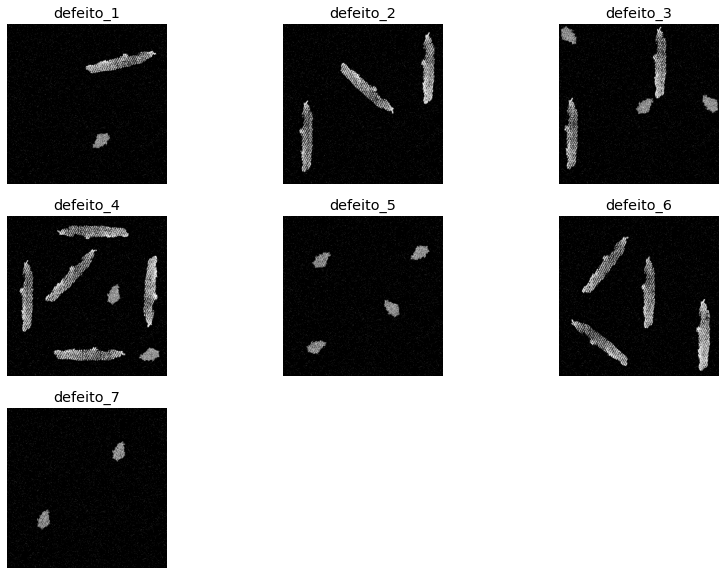

In [6]:
n = len(imgs.keys()) # Definindo o número de linhas
fig = plt.figure(figsize=(14,10))

for i, key in zip(range(0,n),imgs):
    if key == 'sem_defeito' : continue
        
    fig.add_subplot(3,3,i); plt.axis('off')
    plt.title(key)
    plt.imshow(imgs[key]['sub'], cmap='gray')

Podemos ver que os defeitos são nitidamente destados após a subtração, entretanto, realizamos a operação para o "caminho feliz". Para tentar generalizar um pouco a utilziação da técnica, iremos verificar agora a subtração com o procedimento de borramento nas imagens, na expectativa de diminuir a granularidade da textura do jeans.

## 4. Teste de borramento

### 4.1 Máscara 3x3

In [7]:
grid = (3,3)

sd_blur = cv2.blur(imgs['sem_defeito']['matriz'],grid)

for key in imgs:
    if key == 'sem_defeito' : continue
        
    imgs[key]['sub_blur'] = sd_blur - cv2.blur(imgs[key]['matriz'],grid)

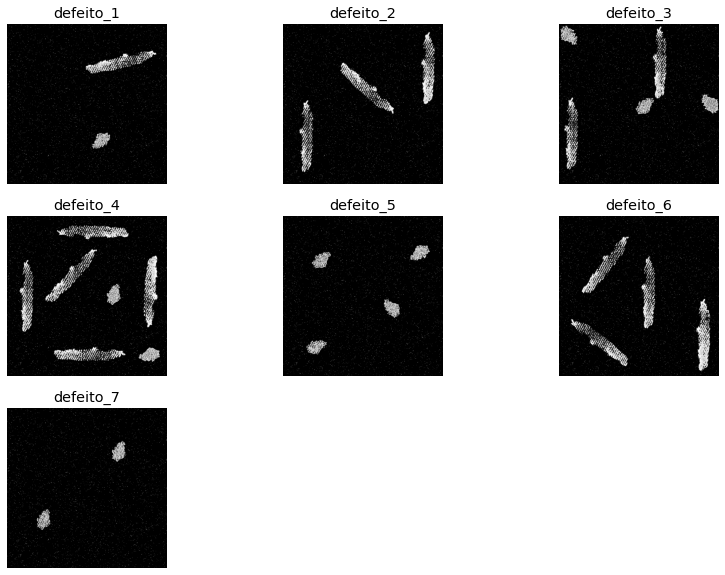

In [8]:
n = len(imgs.keys()) # Definindo o número de linhas
fig = plt.figure(figsize=(14,10))

for i, key in zip(range(0,n),imgs):
    if key == 'sem_defeito' : continue
        
    fig.add_subplot(3,3,i); plt.axis('off')
    plt.title(key)
    plt.imshow(imgs[key]['sub_blur'], cmap='gray')

### 4.2 Máscara 5x5

In [9]:
grid = (5,5)

sd_blur = cv2.blur(imgs['sem_defeito']['matriz'],grid)

for key in imgs:
    if key == 'sem_defeito' : continue
        
    imgs[key]['sub_blur'] = sd_blur - cv2.blur(imgs[key]['matriz'],grid)

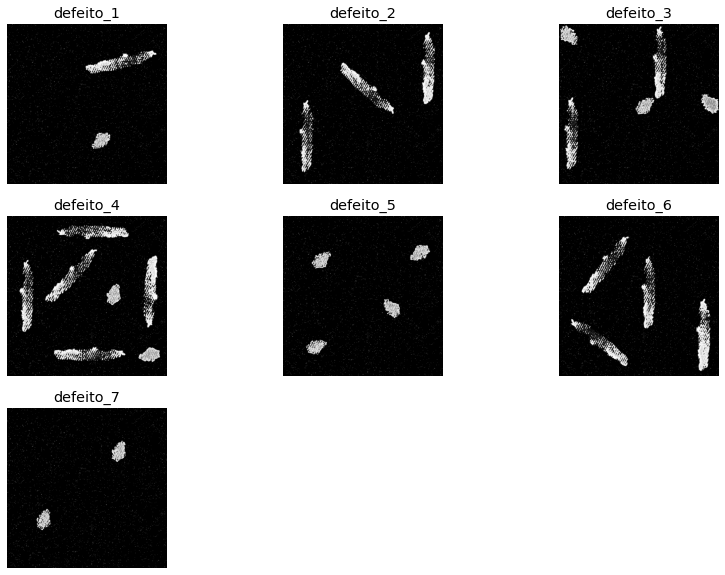

In [10]:
n = len(imgs.keys()) # Definindo o número de linhas
fig = plt.figure(figsize=(14,10))

for i, key in zip(range(0,n),imgs):
    if key == 'sem_defeito' : continue
        
    fig.add_subplot(3,3,i); plt.axis('off')
    plt.title(key)
    plt.imshow(imgs[key]['sub_blur'], cmap='gray')

Os testes de subtração ainda retornaram resultados nítidos mesmo com o borramento, entretanto, estamos ainda utilizando imagens quase iguais, a não ser pela diferença dos defeitos. Para verificar a efetividade da técnica, precisamos comparar o tecido com defeito com outra imagem de jeans.

## 5. Teste borramento com outras amostras de tecido

### 5.1 Máscara 3x3

In [21]:
grid = (3,3)

sd_blur = cv2.blur(cv2.cvtColor(cv2.imread('Tecido_2.jpg'), cv2.COLOR_BGR2GRAY),grid)

for key in imgs:
    if key == 'sem_defeito' : continue
        
    imgs[key]['sub_blur'] = sd_blur - cv2.blur(imgs[key]['matriz'],grid)

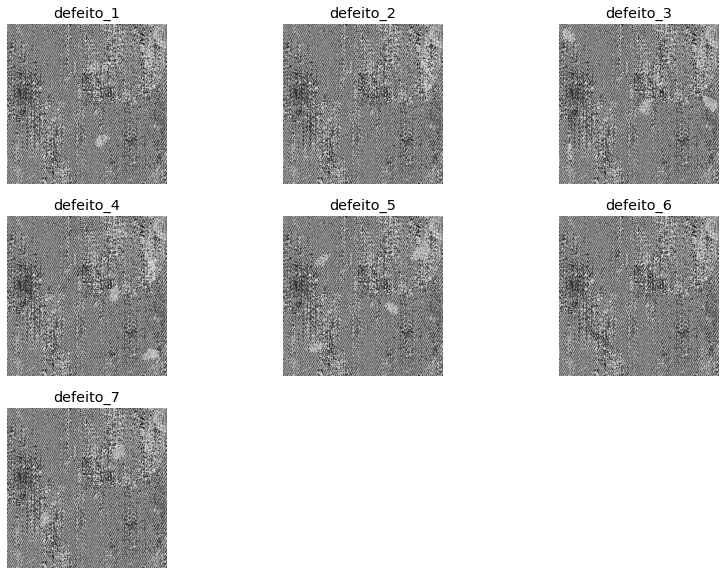

In [22]:
n = len(imgs.keys()) # Definindo o número de linhas
fig = plt.figure(figsize=(14,10))

for i, key in zip(range(0,n),imgs):
    if key == 'sem_defeito' : continue
        
    fig.add_subplot(3,3,i); plt.axis('off')
    plt.title(key)
    plt.imshow(imgs[key]['sub_blur'], cmap='gray')

### 5.2 Máscara 5x5

In [23]:
grid = (5,5)

sd_blur = cv2.blur(cv2.cvtColor(cv2.imread('Tecido_2.jpg'), cv2.COLOR_BGR2GRAY),grid)

for key in imgs:
    if key == 'sem_defeito' : continue
        
    imgs[key]['sub_blur'] = sd_blur - cv2.blur(imgs[key]['matriz'],grid)

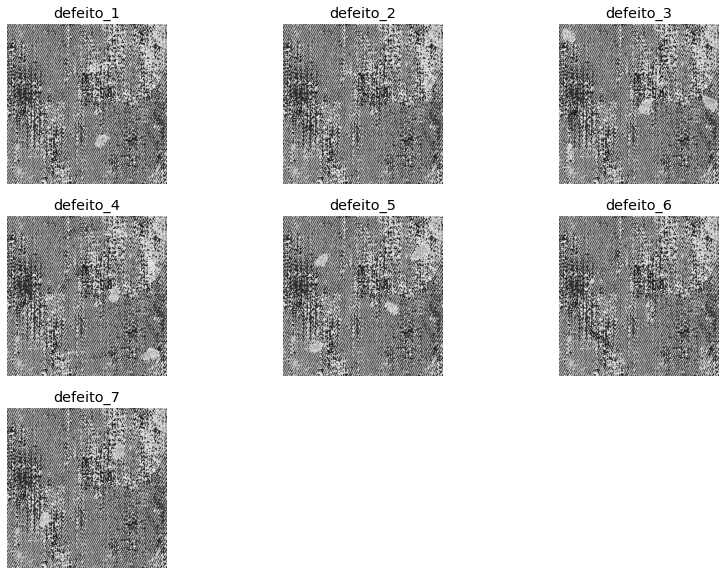

In [24]:
n = len(imgs.keys()) # Definindo o número de linhas
fig = plt.figure(figsize=(14,10))

for i, key in zip(range(0,n),imgs):
    if key == 'sem_defeito' : continue
        
    fig.add_subplot(3,3,i); plt.axis('off')
    plt.title(key)
    plt.imshow(imgs[key]['sub_blur'], cmap='gray')

### 5.3 Máscara 7x7

In [25]:
grid = (7,7)

sd_blur = cv2.blur(cv2.cvtColor(cv2.imread('Tecido_2.jpg'), cv2.COLOR_BGR2GRAY),grid)

for key in imgs:
    if key == 'sem_defeito' : continue
        
    imgs[key]['sub_blur'] = sd_blur - cv2.blur(imgs[key]['matriz'],grid)

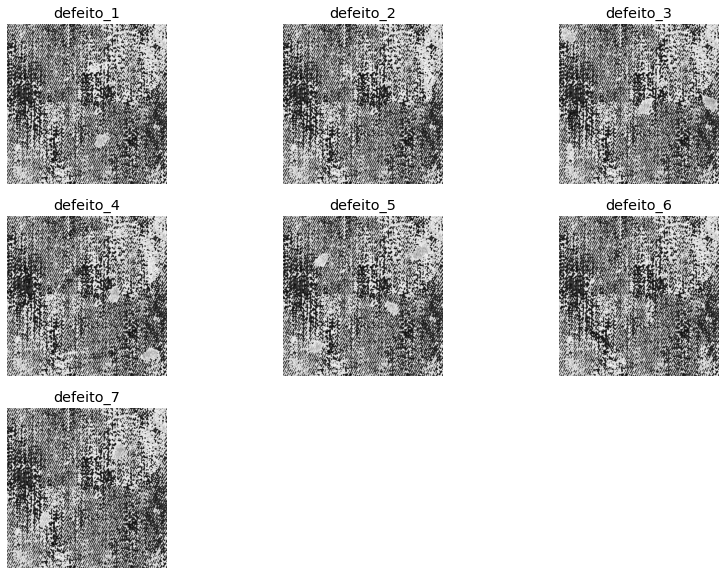

In [26]:
n = len(imgs.keys()) # Definindo o número de linhas
fig = plt.figure(figsize=(14,10))

for i, key in zip(range(0,n),imgs):
    if key == 'sem_defeito' : continue
        
    fig.add_subplot(3,3,i); plt.axis('off')
    plt.title(key)
    plt.imshow(imgs[key]['sub_blur'], cmap='gray')

Para o teste 5, modifiquei a imagem original do tecido (sem defeitos) de forma que parecesse outra imagem, mas que continuasse com a mesma orientação, brilho e contraste, simulando melhor a comparação com outro pedaço de jeans, já que eles nunca serão iguais.

## 6. Conclusão

Nesse notebook verificamos a utilização da subtração como primeiro passo da detecção de defeitos em tecidos de jeans. Nos primeiros testes, conseguimos bons resultados por conta de estamos ainda testando o "caminho feliz", entretanto, testando a subtração com uma imagem diferente (simulando um caso mais real) não obstemos resultados interessantes.